In [51]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [52]:
#how the California real estate market has been affected by the increase in interest rate. 
pd.set_option('display.max_columns', 30)

In [53]:
# Closed Prices raw data
ca_real_estate = pd.read_csv("Resources/California_Real_Estate_Raw_Data_Set.csv")
# Current Prices raw data
current_prices = pd.read_csv("Resources/Current_prices.csv")

In [54]:
# Closed Prices 
ca_real_estate_df = ca_real_estate
# Current Price
current_market_df = current_prices

In [55]:
# Closed Prices renaming column
ca_real_estate_df.rename(columns = {"Contract Status Change Date": "Date"}, inplace = True)
# Current Prices renaming column
current_market_df.rename(columns = {"Contract Status Change Date": "Date"}, inplace = True)

In [56]:
# Closed Prices: changed object to date time format
ca_real_estate_df.Date = pd.to_datetime(ca_real_estate_df.Date, format = "%m/%d/%y")
# Current Prices: change object to date time format
current_market_df.Date = pd.to_datetime(current_market_df.Date, format = "%m/%d/%y")

In [57]:
# Add column for just the month
ca_real_estate_df["month"] = ca_real_estate_df.Date.dt.month
# add column for just the month 
current_market_df['month'] = current_market_df.Date.dt.month

In [58]:
# add column for just the year 
ca_real_estate_df["Year"] = ca_real_estate_df.Date.dt.year
# add column for just the year 
current_market_df['Year'] = current_market_df.Date.dt.year

In [59]:
# change format for the Price Per Square Foot Column
ca_real_estate_df[['Price Per Square Foot']] = ca_real_estate_df[['Price Per Square Foot']].replace('[\$,]','',regex=True).astype(float)
# change format for the Price Per Square Foot Column
current_market_df[['Price Per Square Foot']] = current_market_df[['Price Per Square Foot']].replace('[\$,]','',regex=True).astype(float)

In [60]:
# Change column to float from object 
ca_real_estate_df[['L/C Price']] = ca_real_estate_df[['L/C Price']].replace('[\$,]','',regex=True).astype(float)
# change column to float from object
current_market_df[['L/C Price']] = current_market_df[['L/C Price']].replace('[\$,]','',regex=True).astype(float)

In [61]:
# Droped the ending of the Column 
ca_real_estate_df[["Sqft"]] = ca_real_estate_df.Sqft.str.split('/', expand=True).drop([1], axis = 1)
current_market_df[['Sqft']] = current_market_df.Sqft.str.split('/', expand=True).drop([1], axis = 1)


In [62]:
ca_real_estate_df[["YrBuilt"]] = ca_real_estate_df.YrBuilt.str.split('/', expand=True).drop([1], axis = 1)
current_market_df[['YrBuilt']] = current_market_df.YrBuilt.str.split('/', expand=True).drop([1], axis = 1)

In [63]:
ca_real_estate_df[["Bed & Bath", "A", "B", "C"]] = ca_real_estate_df['Br/Ba'].str.split(",", expand = True)
ca_real_estate_df[["Bed", "Bath"]] = ca_real_estate_df["Bed & Bath"].str.split("/", expand = True)

current_market_df[["Bed & Bath", "A", "B", "C"]] = current_market_df['Br/Ba'].str.split(",", expand = True)
current_market_df[["Bed", "Bath"]] = current_market_df["Bed & Bath"].str.split("/", expand = True)
#fix bathroom into a float


In [64]:
ca_real_estate_df = ca_real_estate_df.drop(columns = ['Bed & Bath'])
current_market_df = current_market_df.drop(columns = ['Bed & Bath'])


In [65]:
ca_real_estate_df.rename(columns = {"Sqft": "Sqft/A"}, inplace = True)
ca_real_estate_df[["LSqft", "Ac"]] = ca_real_estate_df['LSqft/Ac'].str.split('/', expand = True).replace('[\$,]','',regex=True).astype(float)

current_market_df.rename(columns = {"Sqft": "Sqft/A"}, inplace = True)
current_market_df[["LSqft", "Ac"]] = current_market_df['LSqft/Ac'].str.split('/', expand = True).replace('[\$,]','',regex=True).astype(float)

In [66]:
# Closed Prices
sales_data_month_df = ca_real_estate_df.loc[:,["Listing ID", "L/C Price", "month", "County "]]
# Current Listed Prices
current_market = current_market_df.loc[:, ["Listing ID", "L/C Price", "month", "County"]]

In [67]:
#Closed Prices
July_df = sales_data_month_df[sales_data_month_df["month"] == 7.]
August_df = sales_data_month_df[sales_data_month_df["month"] == 8.]
Sept_df = sales_data_month_df[sales_data_month_df["month"] == 9.]
#Current Listed Prices
current_July_df = current_market[current_market['month'] == 7.]
current_August_df = current_market[current_market['month'] == 8.]
current_September_df = current_market[current_market['month'] == 9.]

In [68]:
#Closed Prices
ttest_ind(July_df['L/C Price'], Sept_df['L/C Price'])

Ttest_indResult(statistic=18.562720974798353, pvalue=5.320017767949999e-76)

In [69]:
#Current Listed Prices
ttest_ind(current_July_df['L/C Price'], current_September_df['L/C Price'])

Ttest_indResult(statistic=4.997865212120273, pvalue=6.003407022864367e-07)

In [70]:
# Closed Prices
orange_county = sales_data_month_df[sales_data_month_df['County '] == "Orange"]
Riverside_county = sales_data_month_df[sales_data_month_df['County '] == "Riverside"]
LA_county = sales_data_month_df[sales_data_month_df['County '] == "Los Angeles"]

# Current Listed Prices
current_oc = current_market[current_market['County']=="Orange"]
current_la = current_market[current_market['County']=="Los Angeles"]
current_riverside = current_market[current_market['County']=="Riverside"]


In [71]:
orange_county.head()

,Listing ID,L/C Price,month,County
0,PW19179972,1070000.0,9.0,Orange
1,PW19150297,1299000.0,8.0,Orange
2,OC19161923,590000.0,8.0,Orange
3,OC19194337,679000.0,9.0,Orange
4,OC19155053,715000.0,8.0,Orange


In [72]:
orange_closed_average = orange_county.groupby(['County ', 'month']).mean()
la_closed_average = LA_county.groupby(['County ', 'month']).mean()
riverside_closed_average = Riverside_county.groupby(['County ', 'month']).mean()
orange_closed_average

L/C Price
County  month               
Orange  5.0    898127.404255
        6.0    840646.203333
        7.0    836414.490964
        8.0    828147.472422
        9.0    846740.221239

In [73]:
# Closed Prices
LA_July = LA_county[LA_county['month'] == 7.]
LA_August = LA_county[LA_county['month'] == 8.]
LA_September = LA_county[LA_county['month'] == 9.]

# Closed Prices Merged DataFrame LA County
summer_closed_LA = LA_July.append(LA_August, ignore_index = True)
summer_closed_LA = summer_closed_LA.append(LA_September, ignore_index = True)

# Current Listed Prices
currentLA_July = current_la[current_la['month']==7.]
currentLA_August = current_la[current_la['month']==8.]
currentLA_Sept = current_la[current_la['month']==9.]

# Current Listed Merged DataFrame LA County
summer_current_LA = currentLA_July.append(currentLA_August, ignore_index = True)
summer_current_LA = summer_current_LA.append(currentLA_Sept, ignore_index = True)

In [74]:
# Closed Prices
Orange_July = orange_county[orange_county['month'] == 7.]
Orange_August = orange_county[orange_county['month'] == 8.]
Orange_September = orange_county[orange_county['month'] == 9.]

# Closed Prices Merged DataFrame Orange County
summer_closed_OC = Orange_July.append(Orange_August, ignore_index = True)
summer_closed_OC = summer_closed_OC.append(Orange_September, ignore_index = True)

# Current Listed Prices
currentOC_July = current_oc[current_oc['month']== 7.]
currentOC_August = current_oc[current_oc['month']== 8.]
currentOC_Sept = current_oc[current_oc['month']== 9.]

# Current Listed Merged DataFrame Orange County
summer_current_OC = currentOC_July.append(currentOC_August, ignore_index = True)
summer_current_OC = summer_current_OC.append(currentOC_Sept, ignore_index = True)


In [75]:
# Closed Prices
Riverside_county_July = Riverside_county[Riverside_county['month'] == 7.]
Riverside_county_August = Riverside_county[Riverside_county['month'] == 8.]
Riverside_county_September = Riverside_county[Riverside_county['month'] == 9.]

# Closed Prices Merged DataFrame Riverside County
summer_closed_RC = Riverside_county_July.append(Riverside_county_August, ignore_index = True)
summer_closed_RC = summer_closed_RC.append(Riverside_county_September, ignore_index = True)


# Current Listed Prices
current_riverside_July = current_riverside[current_riverside['month']==7.]
current_riverside_August = current_riverside[current_riverside['month']==8.]
current_riverside_September = current_riverside[current_riverside['month']==9.]

# Current Listed Merged DataFrame Riverside County
summer_current_RC = current_riverside_July.append(current_riverside_August, ignore_index = True)
summer_current_RC = summer_current_RC.append(current_riverside_September, ignore_index = True)


In [76]:
test = summer_closed_RC

In [77]:
Riverside_county_August.head()

,Listing ID,L/C Price,month,County
9639,EV19204795,234900.0,8.0,Riverside
9641,SW19206422,329500.0,8.0,Riverside
9648,DW19204094,400000.0,8.0,Riverside
9659,PW19204937,455000.0,8.0,Riverside
9697,SW19219369,539909.0,8.0,Riverside


In [78]:
ttest_ind(Riverside_county_July['L/C Price'], Riverside_county_August['L/C Price'])

Ttest_indResult(statistic=2.003852052335435, pvalue=0.045238315410216105)

In [79]:
ttest_ind(Riverside_county_August['L/C Price'], Riverside_county_September['L/C Price'])

Ttest_indResult(statistic=0.30246401472707696, pvalue=0.7623122543211315)

In [80]:
ttest_ind(Riverside_county_July['L/C Price'], Riverside_county_September['L/C Price'])

Ttest_indResult(statistic=2.5243677460803093, pvalue=0.011634465377513578)

In [81]:
# Interest Rate Data

interest_rates = {'Date': ['January 2019', 'February 2019', 'March 2019', 'April 2019', 'May 2019','June 2019','July 2019', 'Augutst 2019', 'September 2019'], 
                 'Level(%)': [2.25,2.25,2.25,2.25,2.25,2.25,2.25, 2.00, 1.75]}

In [82]:
# Interest Rate DataFrame
interest_rates_df = pd.DataFrame(interest_rates)

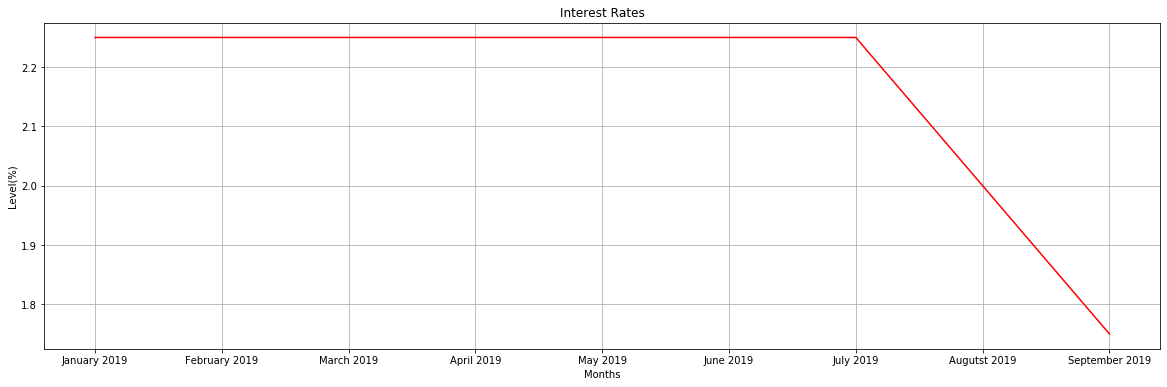

In [83]:
# Interest Rate Graph 2019
figure(num=None, figsize=(20,6))
plt.plot(interest_rates_df['Date'], interest_rates_df['Level(%)'], color = "red")
plt.title("Interest Rates")
plt.xlabel("Months")
plt.ylabel("Level(%)")
plt.grid()

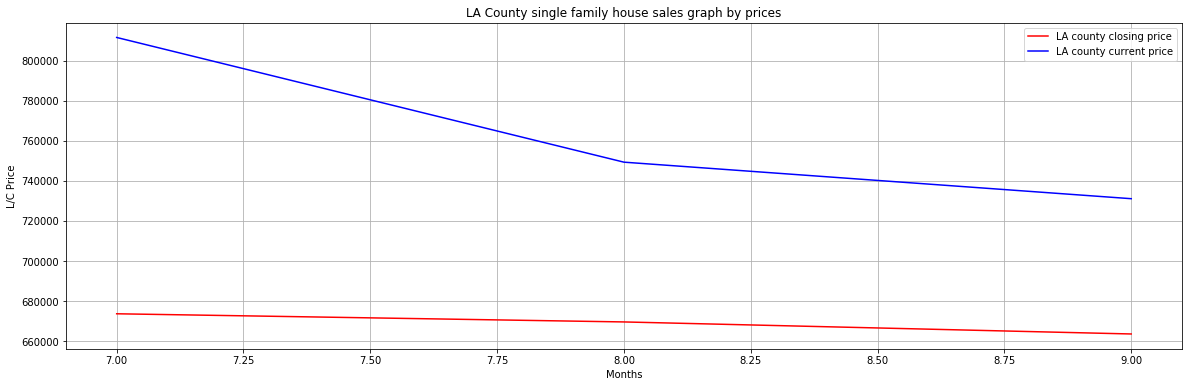

In [84]:
#LA_county_closed_prices_sales_graph
LA_df_closed_price = summer_closed_LA.groupby(["County ", "month"]).mean().reset_index()
LA_df_current_price = summer_current_LA.groupby(["County", "month"]).mean().reset_index()

figure(num=None, figsize=(20,6))
plt.plot(LA_df_closed_price['month'], LA_df_closed_price["L/C Price"], color = "red", label ="LA county closing price")
plt.plot(LA_df_current_price['month'], LA_df_current_price["L/C Price"], color = "blue", label = "LA county current price")
plt.title("LA County single family house sales graph by prices")
plt.legend(loc = "upper right")
plt.xlabel("Months")
plt.ylabel("L/C Price")
plt.grid()

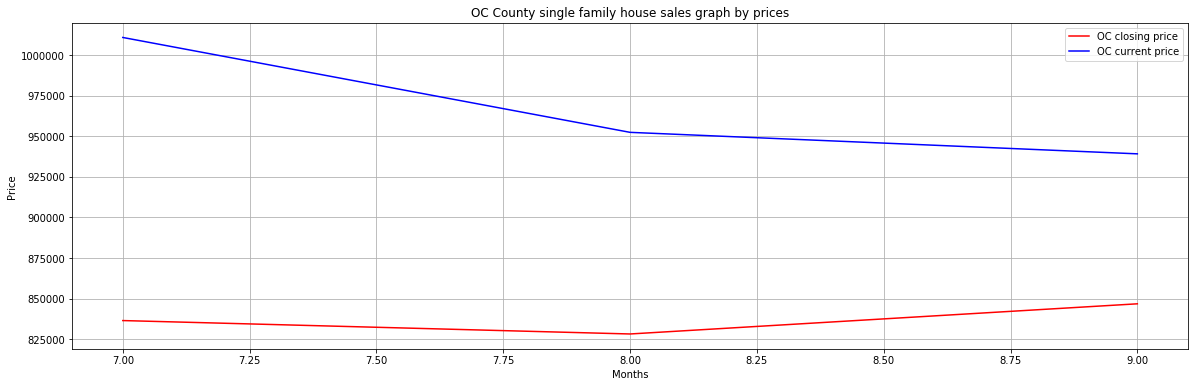

In [85]:
#OC_county_closed_prices_sales_graph
OC_df_closed_price = summer_closed_OC.groupby(["County ", "month"]).mean().reset_index()
OC_df_current_price = summer_current_OC.groupby(["County", "month"]).mean().reset_index()

figure(num=None, figsize=(20,6))
plt.plot(OC_df_closed_price['month'], OC_df_closed_price["L/C Price"], color = "red", label = "OC closing price")
plt.plot(OC_df_current_price['month'], OC_df_current_price["L/C Price"], color = "blue", label ="OC current price")
plt.title("OC County single family house sales graph by prices")
plt.legend(loc = "upper right")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid()

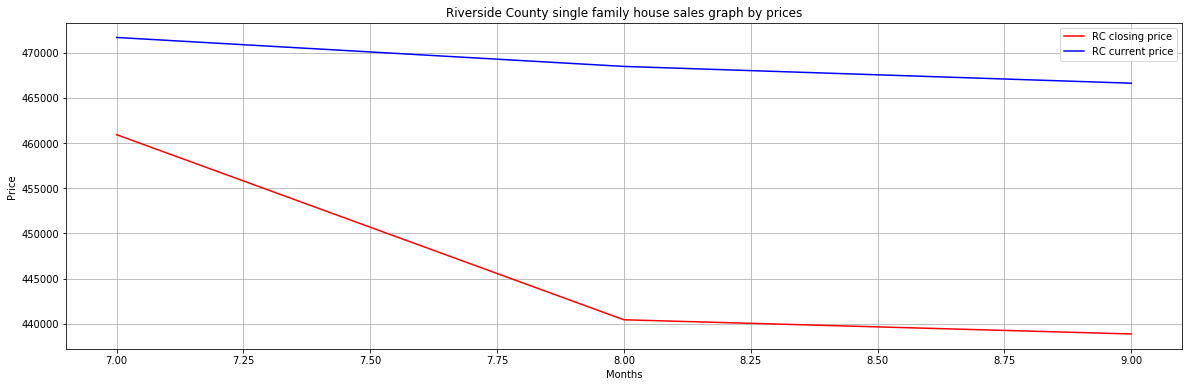

In [86]:
#RC_county_closed_prices_sales_graph
RC_df_closed_price = summer_closed_RC.groupby(["County ", "month"]).mean().reset_index()
RC_df_current_price = summer_current_RC.groupby(["County", "month"]).mean().reset_index()

figure(num=None, figsize=(20,6))
plt.plot(RC_df_closed_price['month'], RC_df_closed_price["L/C Price"], color = "red", label="RC closing price")
plt.plot(RC_df_current_price['month'], RC_df_current_price["L/C Price"], color = "blue", label ="RC current price")
plt.title("Riverside County single family house sales graph by prices")
plt.legend(loc = "upper right")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid()

In [87]:
#BINNING
bins = [0, 400000, 800000, 1200000, 1600000, 2000000]
group_names = [ "<399,999", "400,000-799,999", "800,000-1,199,999", "1,200,000-1,599,999", "1,600,000-2000,000"]

In [88]:
#summer_closed_LA.groupby(["County ", "month"]
summer_closed_LA[""] =pd.cut(summer_closed_LA["L/C Price"], bins, labels = group_names)
group_closed_LA_data = summer_closed_LA.groupby(['']).count().reset_index()
summer_current_LA[''] =pd.cut(summer_current_RC['L/C Price'], bins, labels = group_names)
group_current_LA_data = summer_current_LA.groupby(['']).count().reset_index()
group_closed_LA_data


,,Listing ID,L/C Price,month,County
0,"<399,999",574,574,574,574
1,"400,000-799,999",3246,3246,3246,3246
2,"800,000-1,199,999",768,768,768,768
3,"1,200,000-1,599,999",205,205,205,205
4,"1,600,000-2000,000",66,66,66,66


In [89]:
#summer_closed_OC.groupby(["County ", "month"]
summer_closed_OC[""] =pd.cut(summer_closed_OC["L/C Price"], bins, labels = group_names)
group_closed_OC_data = summer_closed_OC.groupby(['']).count().reset_index()
summer_current_OC[''] =pd.cut(summer_current_OC['L/C Price'], bins, labels = group_names)
group_current_OC_data = summer_current_OC.groupby(['']).count().reset_index()
group_closed_OC_data
group_current_OC_data

,,Listing ID,L/C Price,month,County
0,"<399,999",4,4,4,4
1,"400,000-799,999",508,508,508,508
2,"800,000-1,199,999",532,532,532,532
3,"1,200,000-1,599,999",194,194,194,194
4,"1,600,000-2000,000",66,66,66,66


In [90]:
#summer_closed_OC.groupby(["County ", "month"]
summer_closed_RC[""] =pd.cut(summer_closed_RC["L/C Price"], bins, labels = group_names)
group_closed_RC_data = summer_closed_RC.groupby(['']).count().reset_index()
summer_current_RC[''] =pd.cut(summer_current_RC['L/C Price'], bins, labels = group_names)
group_current_RC_data = summer_current_RC.groupby(['']).count().reset_index()

Text(0, 0.5, 'L/C Prices')

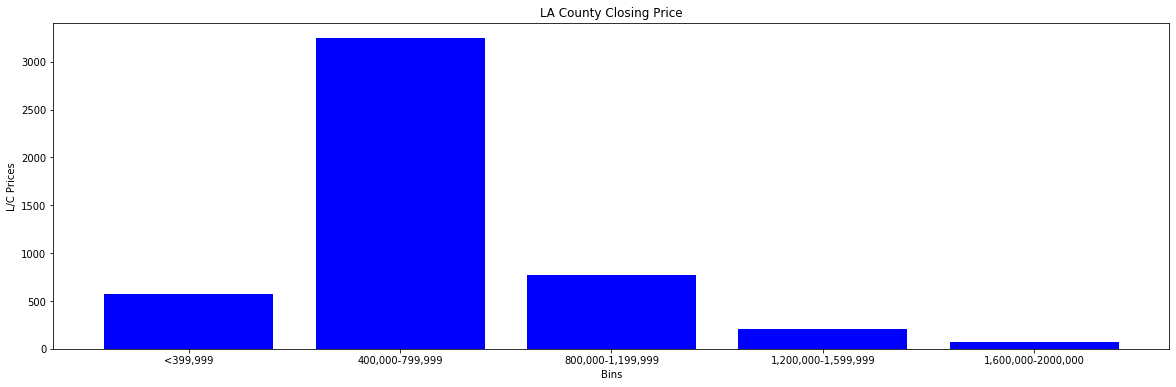

In [91]:
#Bar Graph LA Closed Price

figure(num=None, figsize=(20,6))
group_names = [ "<399,999", "400,000-799,999", "800,000-1,199,999", "1,200,000-1,599,999", "1,600,000-2000,000"]
bar_LA = group_closed_LA_data["L/C Price"]
x_axis = np.arange(len(bar_LA))
plt.bar(x_axis, bar_LA, color="b", align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_names)
plt.title("LA County Closing Price")
plt.xlabel("Bins")
plt.ylabel("L/C Prices")

Text(0, 0.5, 'L/C Prices')

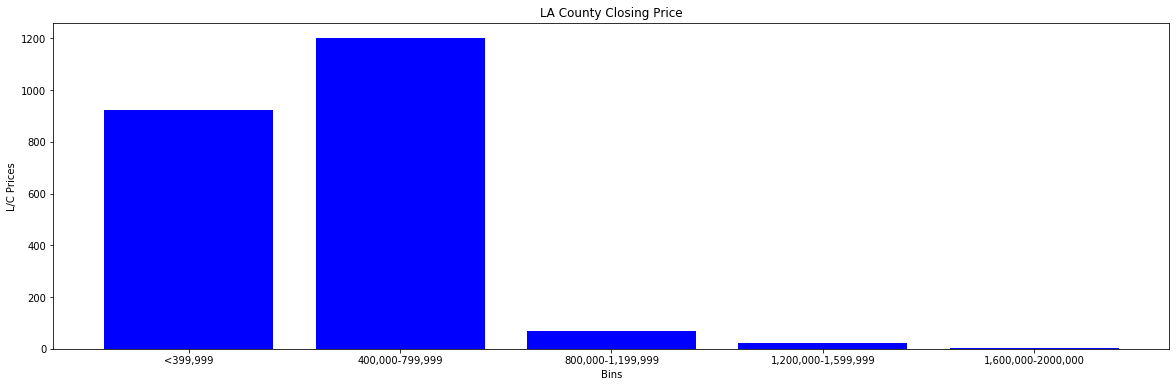

In [92]:
#Bar Graph LA Current Price

figure(num=None, figsize=(20,6))
group_names = [ "<399,999", "400,000-799,999", "800,000-1,199,999", "1,200,000-1,599,999", "1,600,000-2000,000"]
bar_LA = group_current_LA_data["L/C Price"]
x_axis = np.arange(len(bar_LA))
plt.bar(x_axis, bar_LA, color="b", align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_names)
plt.title("LA County Closing Price")
plt.xlabel("Bins")
plt.ylabel("L/C Prices")

Text(0, 0.5, 'L/C Prices')

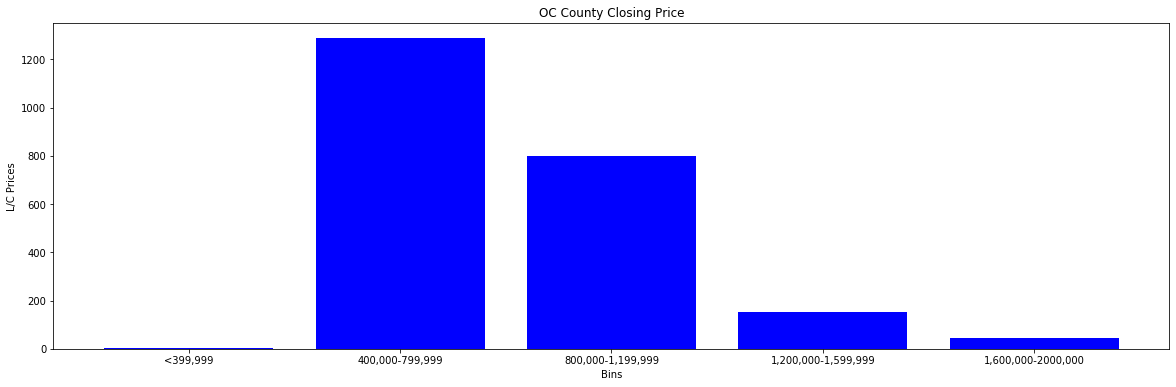

In [93]:
#Bar Graph OC Closed Price

figure(num=None, figsize=(20,6))
group_names = [ "<399,999", "400,000-799,999", "800,000-1,199,999", "1,200,000-1,599,999", "1,600,000-2000,000"]
bar_OC = group_closed_OC_data["L/C Price"]
x_axis = np.arange(len(bar_OC))
plt.bar(x_axis, bar_OC, color="b", align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_names)
plt.title("OC County Closing Price")
plt.xlabel("Bins")
plt.ylabel("L/C Prices")

Text(0, 0.5, 'L/C Prices')

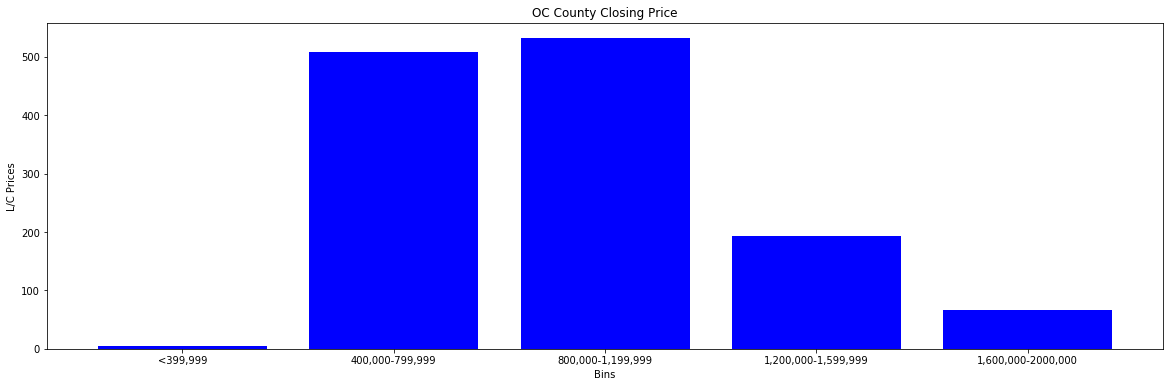

In [94]:
#Bar Graph OC Current Price

figure(num=None, figsize=(20,6))
group_names = [ "<399,999", "400,000-799,999", "800,000-1,199,999", "1,200,000-1,599,999", "1,600,000-2000,000"]
bar_OC = group_current_OC_data["L/C Price"]
x_axis = np.arange(len(bar_OC))
plt.bar(x_axis, bar_OC, color="b", align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_names)
plt.title("OC County Closing Price")
plt.xlabel("Bins")
plt.ylabel("L/C Prices")

Text(0, 0.5, 'L/C Prices')

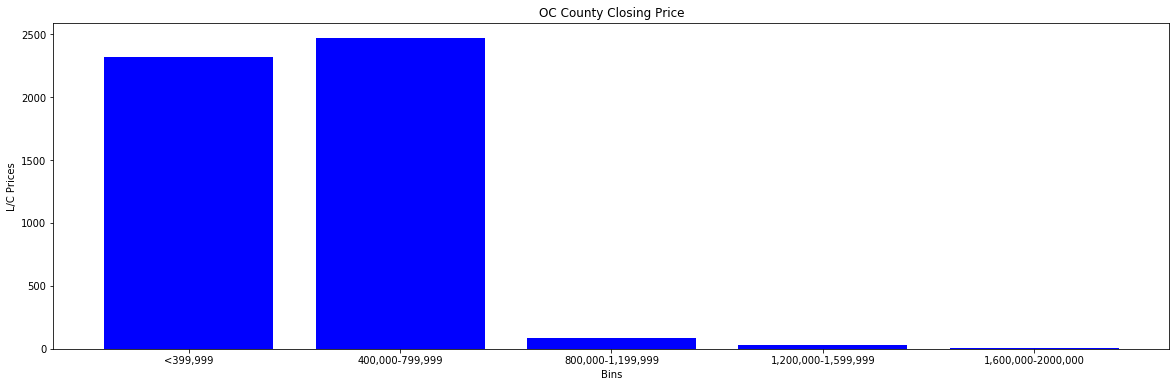

In [95]:
#Bar Graph RC Closed Price

figure(num=None, figsize=(20,6))
group_names = [ "<399,999", "400,000-799,999", "800,000-1,199,999", "1,200,000-1,599,999", "1,600,000-2000,000"]
bar_RC = group_closed_RC_data["L/C Price"]
x_axis = np.arange(len(bar_RC))
plt.bar(x_axis, bar_RC, color="b", align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_names)
plt.title("OC County Closing Price")
plt.xlabel("Bins")
plt.ylabel("L/C Prices")

AttributeError: 'BarContainer' object has no attribute 'savefig'

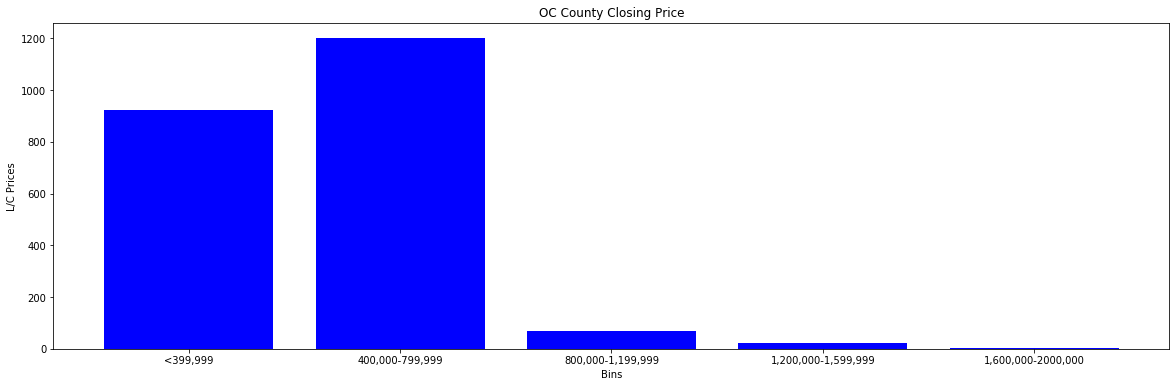

In [96]:
#Bar Graph RC Closed Price

figure(num=None, figsize=(20,6))
group_names = [ "<399,999", "400,000-799,999", "800,000-1,199,999", "1,200,000-1,599,999", "1,600,000-2000,000"]
bar_RC = group_current_RC_data["L/C Price"]
x_axis = np.arange(len(bar_RC))
plt.bar(x_axis, bar_RC, color="b", align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, group_names)
plt.title("OC County Closing Price")
plt.xlabel("Bins")
plt.ylabel("L/C Prices")

fig.savefig('OC_closing_price.png')